In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, ReLU

#### Build a feedforward neural network model

In [17]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16),
    ReLU(),
    Dense(16,activation = 'sigmoid'),
    Dense(10),
    Softmax()
])
identicalModel = Sequential([
    Flatten(input_shape=(28,28), name='Flatten'),
    Dense(16,activation='relu', name='Hidden2'),
    Dense(16,activation = 'sigmoid', name= 'Hidden1'),
    Dense(10,activation='softmax', name= 'Output')
])

In [18]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
__________________________________________________

In [16]:
identicalModel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 16)                12560     
_________________________________________________________________
Hidden1 (Dense)              (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D

#### Build a convolutional neural network model

In [5]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, kernel_size=3, strides=(2,2), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [5]:
# Print the model summary

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 37,738
Trainable params: 37,738
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [6]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.MeanAbsoluteError()]
             )


In [7]:
# Print the resulting model attributes
print(f"{model.metrics}\n{model.optimizer},\n,{model.loss}\n{model.optimizer.lr}")

[]
,<tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x000002D18322A188>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [16]:
import numpy as np

In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [9]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [10]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [11]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images /255

Ankle boot


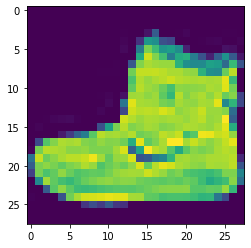

In [20]:
# Display one of the images
plt.imshow(train_images[0])
print(labels[train_labels[0]])


#### Fit the model

In [21]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [12]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4631 - sparse_categorical_accuracy: 0.8295 - mean_absolute_error: 4.4200
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3492 - sparse_categorical_accuracy: 0.8694 - mean_absolute_error: 4.4200
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3172 - sparse_categorical_accuracy: 0.8809 - mean_absolute_error: 4.4200
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8888 - mean_absolute_error: 4.4200
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.8943 - mean_absolute_error: 4.4200


#### Plot training history

In [13]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.463085,0.829483,4.420009
1,0.349203,0.869383,4.420010
2,0.317177,0.880900,4.420007
3,0.295140,0.888833,4.420011
4,0.278053,0.894300,4.420014


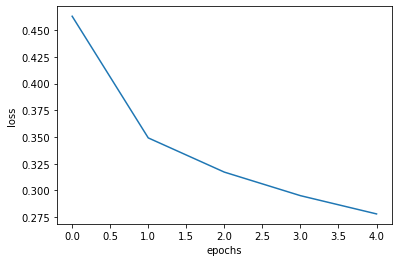

In [14]:
# Make a plot for the loss

plt.plot(df['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Text(0, 0.5, 'accuracy')

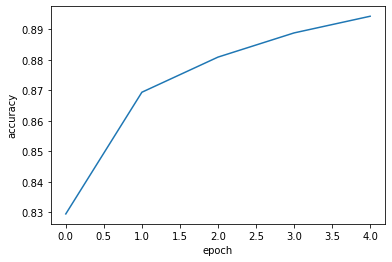

In [15]:
# Make a plot for the accuracy
plt.plot(df['sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


Text(0, 0.5, 'mse')

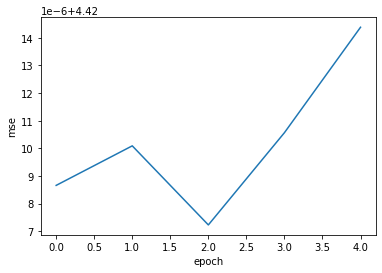

In [16]:
# Make a plot for the additional metric
plt.plot(df['mean_absolute_error'])
plt.xlabel('epoch')
plt.ylabel('mse')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [17]:
# Evaluate the model

loss,sca,mse = model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

313/313 - 1s - loss: 0.3468 - sparse_categorical_accuracy: 0.8726 - mean_absolute_error: 4.4200


#### Make predictions from the model

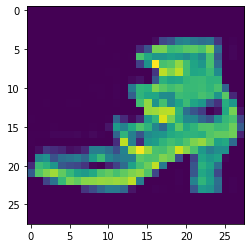

Label: Ankle boot


In [18]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [22]:
# Get the model predictions

pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Label is {labels[np.argmax(pred)]}")

Label is Ankle boot


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True